In [1]:
#import the required libraries and dependencies

import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
sp500_df = pd.read_csv(Path("S&P 500 Historical Data.csv"), index_col='Date', parse_dates=True, infer_datetime_format=True)

display(sp500_df.head())

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-06,"3,845.08","3,831.98","3,870.91","3,809.37",-,0.36%
2022-07-05,"3,831.39","3,792.61","3,832.19","3,742.06",-,0.16%
2022-07-01,"3,825.33","3,781.00","3,829.82","3,752.10",-,1.06%
2022-06-30,"3,785.38","3,785.99","3,818.99","3,738.67",-,-0.88%
2022-06-29,"3,818.83","3,825.09","3,836.50","3,799.02",-,-0.07%


In [3]:
#use pandas read csv function to import csv file
#replace all the commons with nothing
bitcoin_df = pd.read_csv(Path("Bitcoin Historical Data - Investing.com India.csv"), index_col='Date', parse_dates=True, infer_datetime_format=True)


bitcoin_df.replace(',','', regex=True, inplace=True)

display(bitcoin_df.head())
display(bitcoin_df.dtypes)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82K,-1.24%
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24K,1.78%
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43K,-0.08%
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79K,4.69%
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27K,0.35%


Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [4]:
#convert all values to str so that we can further clean
bitcoin_df.astype('str')
display(bitcoin_df.dtypes)


Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [5]:
#cleaning the vol collum
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('K','')
bitcoin_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82,-1.24%
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24,1.78%
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,-0.08%
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,4.69%
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,0.35%


In [6]:
#cleaning the vol column more
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('M','')
bitcoin_df.head()
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('B','')
bitcoin_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82,-1.24%
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24,1.78%
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,-0.08%
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,4.69%
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,0.35%


In [7]:
#dropping the change % column bc it is a nuisance
bitcoin_df = bitcoin_df.drop(bitcoin_df.columns[5],axis=1)
bitcoin_df.head()


,Price,Open,High,Low,Vol.
Date,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27


In [8]:
# more cleaning of the vol column
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('-','0')


In [9]:
#converting all the values to float so we can perform calculations boi
bitcoin_df = bitcoin_df.apply(pd.to_numeric)
display(bitcoin_df.dtypes)


Price    float64
Open     float64
High     float64
Low      float64
Vol.     float64
dtype: object

In [10]:
#taking the average of price, open, high, low to create a new column that is the avg daily price
bitcoin_df['avg daily price'] = bitcoin_df.iloc[:, [0,1,2,3]].mean(axis=1)
display(bitcoin_df.head())
display(bitcoin_df.tail())

                        


,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82,20432.900
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24,20295.425
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,20109.675
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,19720.675
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,19243.525


,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2010-07-22,0.1,0.1,0.1,0.1,2.16,0.100
2010-07-21,0.1,0.1,0.1,0.1,0.58,0.100
2010-07-20,0.1,0.1,0.1,0.1,0.26,0.100
2010-07-19,0.1,0.1,0.1,0.1,0.57,0.100
2010-07-18,0.1,0.0,0.1,0.1,0.08,0.075


In [11]:
sp500_df.replace(',','', regex=True, inplace=True)
sp500_df.head()


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-06,3845.08,3831.98,3870.91,3809.37,-,0.36%
2022-07-05,3831.39,3792.61,3832.19,3742.06,-,0.16%
2022-07-01,3825.33,3781.00,3829.82,3752.10,-,1.06%
2022-06-30,3785.38,3785.99,3818.99,3738.67,-,-0.88%
2022-06-29,3818.83,3825.09,3836.50,3799.02,-,-0.07%


In [12]:
sp500_df.drop(columns=['Vol.','Change %'], inplace=True)
sp500_df.head()

,Price,Open,High,Low
Date,,,,
2022-07-06,3845.08,3831.98,3870.91,3809.37
2022-07-05,3831.39,3792.61,3832.19,3742.06
2022-07-01,3825.33,3781.00,3829.82,3752.10
2022-06-30,3785.38,3785.99,3818.99,3738.67
2022-06-29,3818.83,3825.09,3836.50,3799.02


In [13]:
sp500_df = sp500_df.apply(pd.to_numeric)
display(sp500_df.dtypes)

Price    float64
Open     float64
High     float64
Low      float64
dtype: object

In [14]:
sp500_df['avg daily price'] = sp500_df.iloc[:, [0,1,2,3]].mean(axis=1)
display(sp500_df.head())
display(sp500_df.tail())

,Price,Open,High,Low,avg daily price
Date,,,,,
2022-07-06,3845.08,3831.98,3870.91,3809.37,3839.3350
2022-07-05,3831.39,3792.61,3832.19,3742.06,3799.5625
2022-07-01,3825.33,3781.00,3829.82,3752.10,3797.0625
2022-06-30,3785.38,3785.99,3818.99,3738.67,3782.2575
2022-06-29,3818.83,3825.09,3836.50,3799.02,3819.8600


,Price,Open,High,Low,avg daily price
Date,,,,,
2010-06-11,1091.60,1082.65,1092.25,1077.12,1085.9050
2010-06-10,1086.84,1058.77,1087.85,1058.77,1073.0575
2010-06-09,1055.69,1062.75,1077.74,1052.25,1062.1075
2010-06-08,1062.00,1050.81,1063.15,1042.17,1054.5325
2010-06-07,1050.47,1065.84,1071.36,1049.86,1059.3825


# calculate the sharpe ratio

In [15]:
bitcoin_df_reverse = bitcoin_df
bitcoin_df_reverse = bitcoin_df_reverse.iloc[::-1]
bitcoin_df_reverse

,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08,0.075
2010-07-19,0.1,0.1,0.1,0.1,0.57,0.100
2010-07-20,0.1,0.1,0.1,0.1,0.26,0.100
2010-07-21,0.1,0.1,0.1,0.1,0.58,0.100
2010-07-22,0.1,0.1,0.1,0.1,2.16,0.100
...,...,...,...,...,...,...
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,19243.525
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,19720.675
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,20109.675


In [16]:
bitcoin = bitcoin_df_reverse.loc['2012-01-12':'2022-07-07',:]
bitcoin

,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2012-01-12,6.8,6.9,7.0,6.3,140.12,6.750
2012-01-13,6.4,6.8,6.8,6.4,60.23,6.600
2012-01-14,6.8,6.4,6.9,6.2,141.90,6.575
2012-01-15,7.0,6.8,7.1,6.7,62.23,6.900
2012-01-16,6.7,7.0,7.2,6.5,122.67,6.850
...,...,...,...,...,...,...
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,19243.525
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,19720.675
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,20109.675


In [17]:
bitcoin_daily_change =  bitcoin['avg daily price'].pct_change().dropna()
bitcoin_daily_change.head()

Date
2012-01-13   -0.022222
2012-01-14   -0.003788
2012-01-15    0.049430
2012-01-16   -0.007246
2012-01-17   -0.131387
Name: avg daily price, dtype: float64

In [18]:
average_annual_return_bitcoin = bitcoin_daily_change.mean() *365
average_annual_return_bitcoin

1.1196726221876656

In [19]:
sp500_df_reverse = sp500_df
sp500_df_reverse = sp500_df_reverse.iloc[::-1]
sp500_df_reverse

,Price,Open,High,Low,avg daily price
Date,,,,,
2010-06-07,1050.47,1065.84,1071.36,1049.86,1059.3825
2010-06-08,1062.00,1050.81,1063.15,1042.17,1054.5325
2010-06-09,1055.69,1062.75,1077.74,1052.25,1062.1075
2010-06-10,1086.84,1058.77,1087.85,1058.77,1073.0575
2010-06-11,1091.60,1082.65,1092.25,1077.12,1085.9050
...,...,...,...,...,...
2022-06-29,3818.83,3825.09,3836.50,3799.02,3819.8600
2022-06-30,3785.38,3785.99,3818.99,3738.67,3782.2575
2022-07-01,3825.33,3781.00,3829.82,3752.10,3797.0625


In [20]:
sp500 = sp500_df_reverse.loc['2012-01-12':'2022-07-07',:]
sp500

,Price,Open,High,Low,avg daily price
Date,,,,,
2012-01-12,1295.50,1292.48,1296.82,1285.77,1292.6425
2012-01-13,1289.09,1294.82,1294.82,1277.58,1289.0775
2012-01-17,1293.67,1290.22,1303.00,1290.22,1294.2775
2012-01-18,1308.04,1293.65,1308.11,1290.99,1300.1975
2012-01-19,1314.50,1308.07,1315.49,1308.07,1311.5325
...,...,...,...,...,...
2022-06-29,3818.83,3825.09,3836.50,3799.02,3819.8600
2022-06-30,3785.38,3785.99,3818.99,3738.67,3782.2575
2022-07-01,3825.33,3781.00,3829.82,3752.10,3797.0625


In [21]:
sp500_daily_change =  sp500['avg daily price'].pct_change().dropna()
sp500_daily_change.head()

Date
2012-01-13   -0.002758
2012-01-17    0.004034
2012-01-18    0.004574
2012-01-19    0.008718
2012-01-20    0.001580
Name: avg daily price, dtype: float64

In [22]:
average_annual_return_sp500 = sp500_daily_change.mean() *252
average_annual_return_sp500

0.11183887459735849

In [23]:
annualized_std_bitcoin = bitcoin_daily_change.std()*np.sqrt(365)
annualized_std_bitcoin

0.9928437027806027

In [24]:
#sharpe ration = average annual return/ annualized standard deviation
sharpe_ratio_bitcoin = average_annual_return_bitcoin/annualized_std_bitcoin
sharpe_ratio_bitcoin

1.127743086904676

In [25]:
annualized_std_sp500 = sp500_daily_change.std()*252**(1/2)
annualized_std_sp500

0.12421380148486161

In [26]:
#sharpe ratio sp500
sharpe_ratio_sp500 = average_annual_return_sp500/annualized_std_sp500
sharpe_ratio_sp500

0.9003739782570676

In [27]:
sp500_one = sp500['avg daily price']
bitcoin_one = bitcoin['avg daily price']
display(bitcoin_one)
display(sp500_one)

Date
2012-01-12        6.750
2012-01-13        6.600
2012-01-14        6.575
2012-01-15        6.900
2012-01-16        6.850
                ...    
2022-07-03    19243.525
2022-07-04    19720.675
2022-07-05    20109.675
2022-07-06    20295.425
2022-07-07    20432.900
Name: avg daily price, Length: 3830, dtype: float64

Date
2012-01-12    1292.6425
2012-01-13    1289.0775
2012-01-17    1294.2775
2012-01-18    1300.1975
2012-01-19    1311.5325
                ...    
2022-06-29    3819.8600
2022-06-30    3782.2575
2022-07-01    3797.0625
2022-07-05    3799.5625
2022-07-06    3839.3350
Name: avg daily price, Length: 2637, dtype: float64

In [28]:
bitcoin_sp500 = pd.concat([bitcoin_one, sp500_one], axis="columns", join="inner")
bitcoin_sp500

,avg daily price,avg daily price
Date,,
2012-01-12,6.750,1292.6425
2012-01-13,6.600,1289.0775
2012-01-17,5.950,1294.2775
2012-01-18,5.875,1300.1975
2012-01-19,6.150,1311.5325
...,...,...
2022-06-29,20171.450,3819.8600
2022-06-30,19718.925,3782.2575
2022-07-01,19738.800,3797.0625


In [29]:
bitcoin_sp500.columns = ['Bitcoin','S&P 500']
bitcoin_sp500.head()

,Bitcoin,S&P 500
Date,,
2012-01-12,6.750,1292.6425
2012-01-13,6.600,1289.0775
2012-01-17,5.950,1294.2775
2012-01-18,5.875,1300.1975
2012-01-19,6.150,1311.5325


<AxesSubplot:xlabel='Date'>

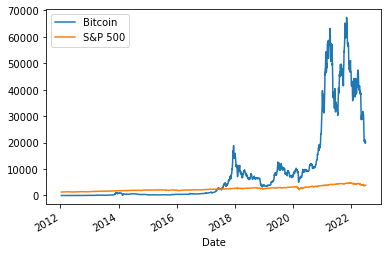

In [30]:
bitcoin_sp500.plot()

<AxesSubplot:xlabel='Date'>

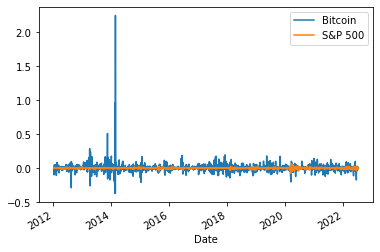

In [31]:
bitcoin_sp500.pct_change().plot()

In [32]:
cumulative_returns = (1 + bitcoin_sp500.pct_change()).cumprod() - 1
cumulative_returns.tail()

,Bitcoin,S&P 500
Date,,
2022-06-29,2987.362963,1.955078
2022-06-30,2920.322222,1.925989
2022-07-01,2923.266667,1.937442
2022-07-05,2978.211111,1.939376
2022-07-06,3005.729630,1.970144


<AxesSubplot:xlabel='Bitcoin', ylabel='S&P 500'>

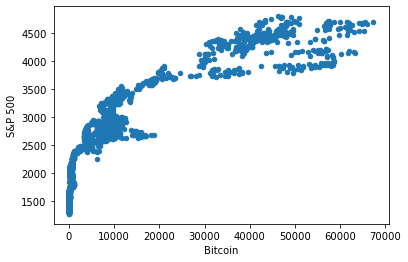

In [33]:
bitcoin_sp500.plot(kind='scatter', x='Bitcoin', y='S&P 500')

In [34]:
bitcoin_sp500.corr()

,Bitcoin,S&P 500
Bitcoin,1.000000,0.883682
S&P 500,0.883682,1.000000


In [35]:
daily_returns_both = bitcoin_sp500.pct_change().dropna()
daily_returns_both.std()

Bitcoin    0.065156
S&P 500    0.007825
dtype: float64

In [36]:
covariance = daily_returns_both['Bitcoin'].cov(daily_returns_both['S&P 500'])
covariance

4.0485977870235127e-05

In [37]:
variance_sp500 = daily_returns_both['S&P 500'].var()
variance_sp500

6.12264622195262e-05

In [38]:
#calculate beta

bitcoin_beta = covariance/variance_sp500
bitcoin_beta

0.6612496688943662

<AxesSubplot:xlabel='Date'>

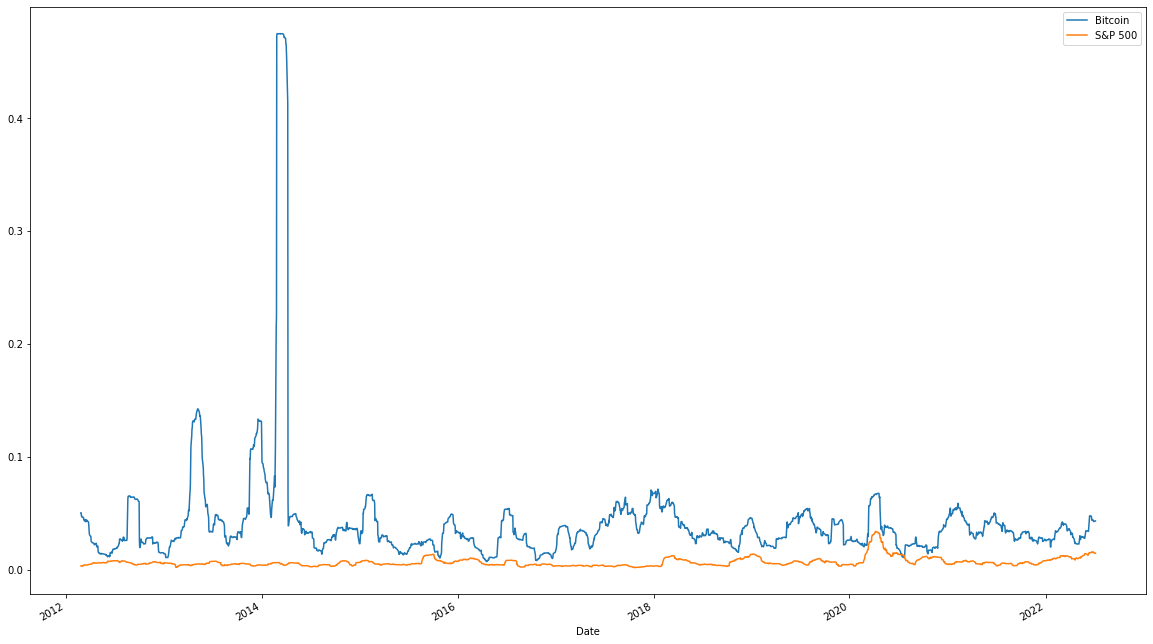

In [39]:
daily_returns_both.rolling(window=30).std().plot(figsize=(20,12))

<AxesSubplot:xlabel='Date,None'>

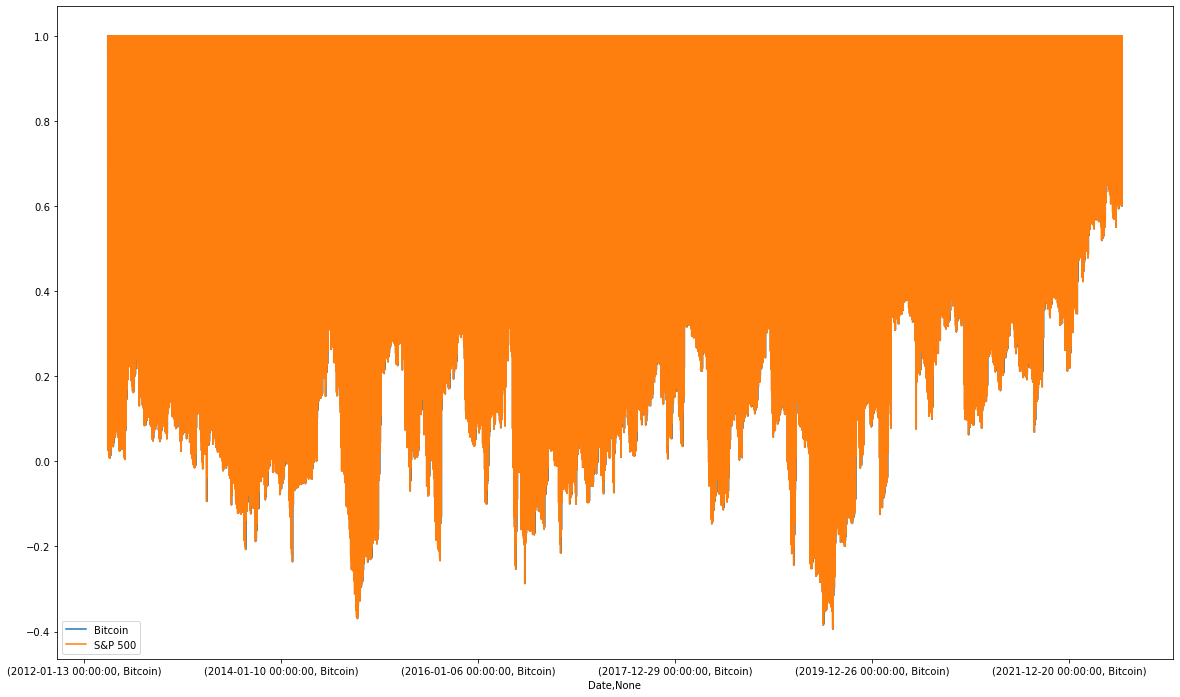

In [40]:
daily_returns_both.rolling(window=60).corr().plot(figsize=(20,12))

In [41]:
sp500_daily_change = sp500_one.pct_change().dropna()
bitcoin_daily_change = bitcoin_one.pct_change().dropna()
display(bitcoin_daily_change)
display(sp500_daily_change)


Date
2012-01-13   -0.022222
2012-01-14   -0.003788
2012-01-15    0.049430
2012-01-16   -0.007246
2012-01-17   -0.131387
                ...   
2022-07-03    0.000308
2022-07-04    0.024795
2022-07-05    0.019725
2022-07-06    0.009237
2022-07-07    0.006774
Name: avg daily price, Length: 3829, dtype: float64

Date
2012-01-13   -0.002758
2012-01-17    0.004034
2012-01-18    0.004574
2012-01-19    0.008718
2012-01-20    0.001580
                ...   
2022-06-29   -0.014265
2022-06-30   -0.009844
2022-07-01    0.003914
2022-07-05    0.000658
2022-07-06    0.010468
Name: avg daily price, Length: 2636, dtype: float64

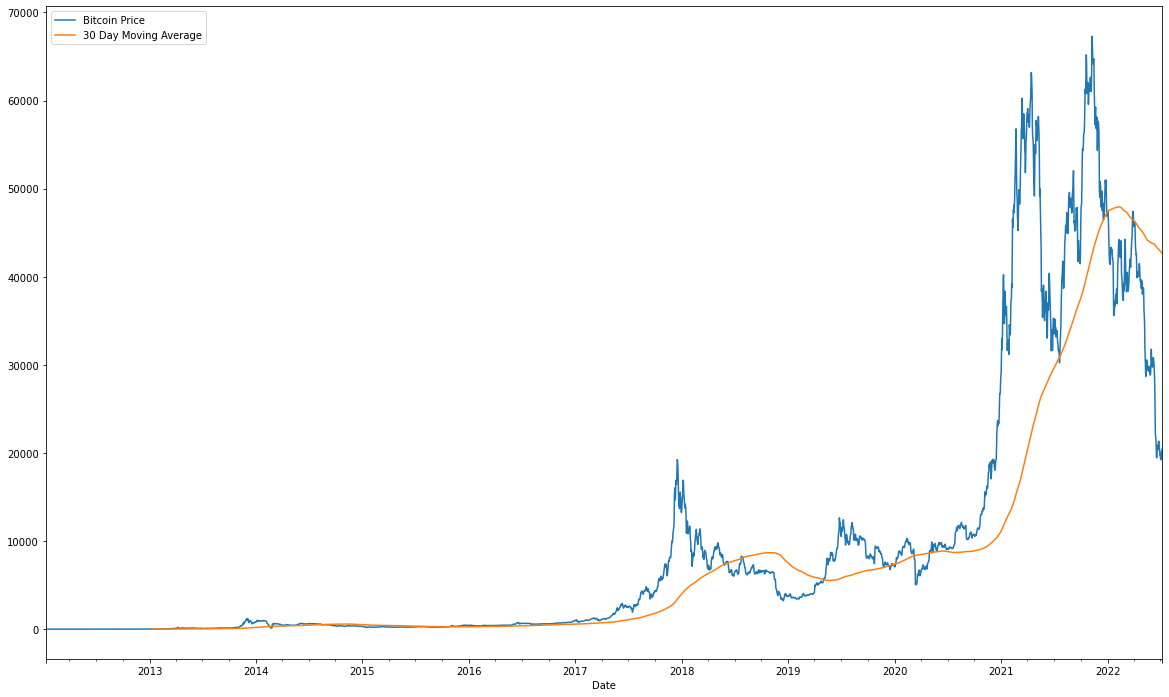

In [42]:
ax = bitcoin_one.plot(figsize=(20,12))
bitcoin_one.rolling(window=365).mean().plot(ax=ax)
ax.legend(['Bitcoin Price','30 Day Moving Average'])

<AxesSubplot:xlabel='Date'>

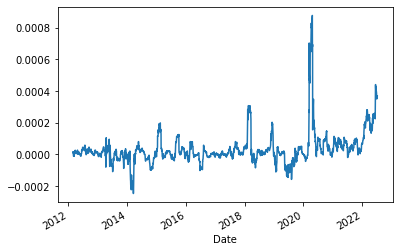

In [43]:
rolling_covariance = daily_returns_both['Bitcoin'].rolling(window=30).cov(daily_returns_both['S&P 500'])
rolling_covariance =rolling_covariance.dropna()
rolling_covariance.plot()


In [44]:
rolling_variance = daily_returns_both['S&P 500'].rolling(window=30).var()
rolling_variance = rolling_variance.dropna()

<AxesSubplot:xlabel='Date'>

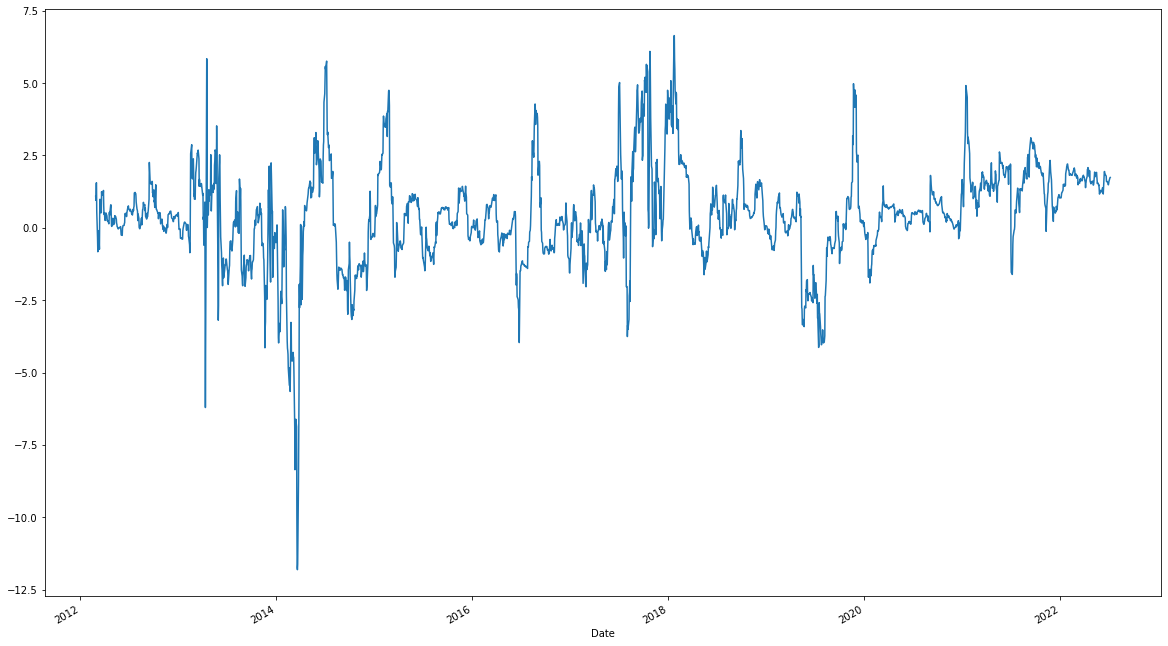

In [45]:
rolling_beta_bitcoin = rolling_covariance/rolling_variance
rolling_beta_bitcoin.plot(figsize=(20,12))

In [46]:
# calculate rolling sharpe ratio of bitcoin
average_annual_return_bitcoin_rolling = bitcoin_daily_change.rolling(window=365).mean()*365

average_annual_return_bitcoin_rolling = average_annual_return_bitcoin_rolling.dropna()

average_annual_std_bitcoin_rolling = bitcoin_daily_change.rolling(window=365).std() * np.sqrt(365)
average_annual_std_bitcoin_rolling = average_annual_std_bitcoin_rolling.dropna()

average_annual_std_bitcoin_rolling

Date
2013-01-11    0.493693
2013-01-12    0.493077
2013-01-13    0.493056
2013-01-14    0.490822
2013-01-15    0.490730
                ...   
2022-07-03    0.498148
2022-07-04    0.497936
2022-07-05    0.497881
2022-07-06    0.497959
2022-07-07    0.498006
Name: avg daily price, Length: 3465, dtype: float64

AttributeError: 'numpy.float64' object has no attribute 'plot'

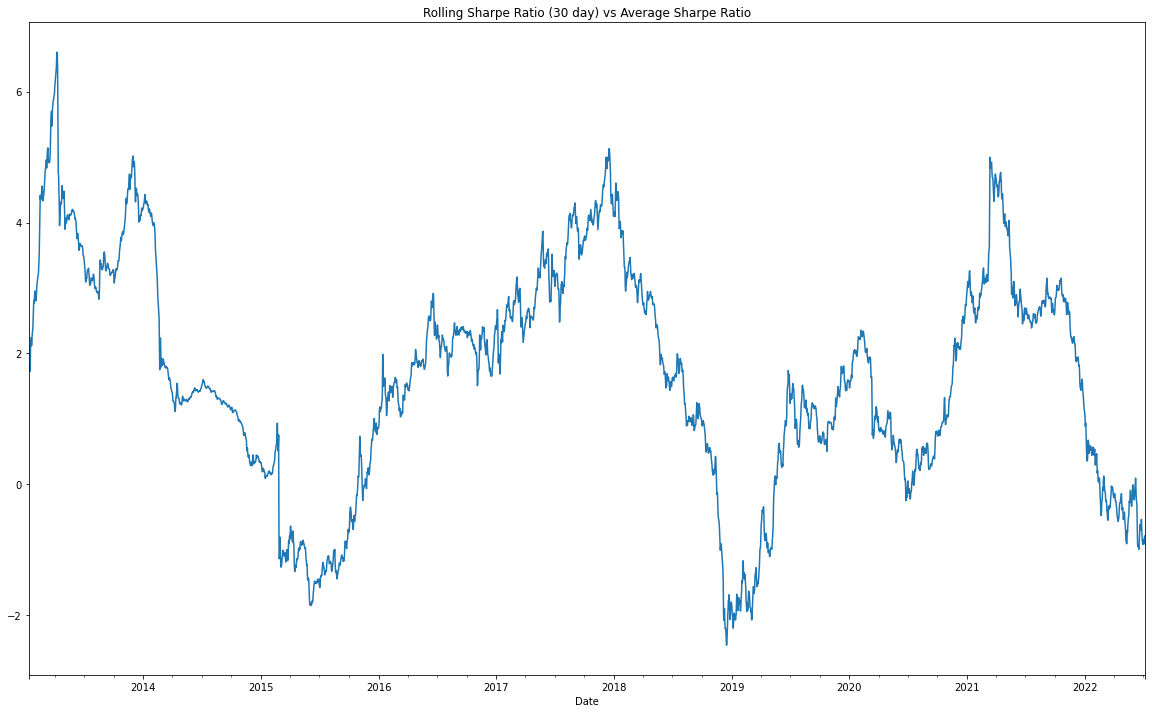

In [47]:
rolling_sharpe_ratio = average_annual_return_bitcoin_rolling/average_annual_std_bitcoin_rolling
ax = rolling_sharpe_ratio.plot(figsize=(20,12), title = "Rolling Sharpe Ratio (30 day) vs Average Sharpe Ratio")
sharpe_ratio_bitcoin.plot(ax)
ax.lengend(['Rolling Sharpe Ratio (30 Day)','Average Sharpe Ratio'])
rolling_sharpe_ratio

In [80]:
# calculate rolling treynor ratio average anual return/ anual beta
#rolling_sharpe_ratio['average'] = sharpe_ratio_bitcoin
#sharpe_ratio_simple = bitcoin_one[
#rolling_sharpe_ratio.rename(index={0: "rolling"})
#display(rolling_sharpe_ratio.tail())
#rolling_sharpe_ratio.iloc([1]) = 1.13
#display(bitcoin)
#display(rolling_sharpe_ratio.tail())
#bitcoin_test = bitcoin['sharpe'] = 1.13
#display(bitcoin_test)
#sp500['sharpe'] = .90
#sp500.drop(columns=['Price','Open','High','Low','avg daily price'], inplace=True)
sp500

,sharpe
Date,
2012-01-12,0.9
2012-01-13,0.9
2012-01-17,0.9
2012-01-18,0.9
2012-01-19,0.9
...,...
2022-06-29,0.9
2022-06-30,0.9
2022-07-01,0.9


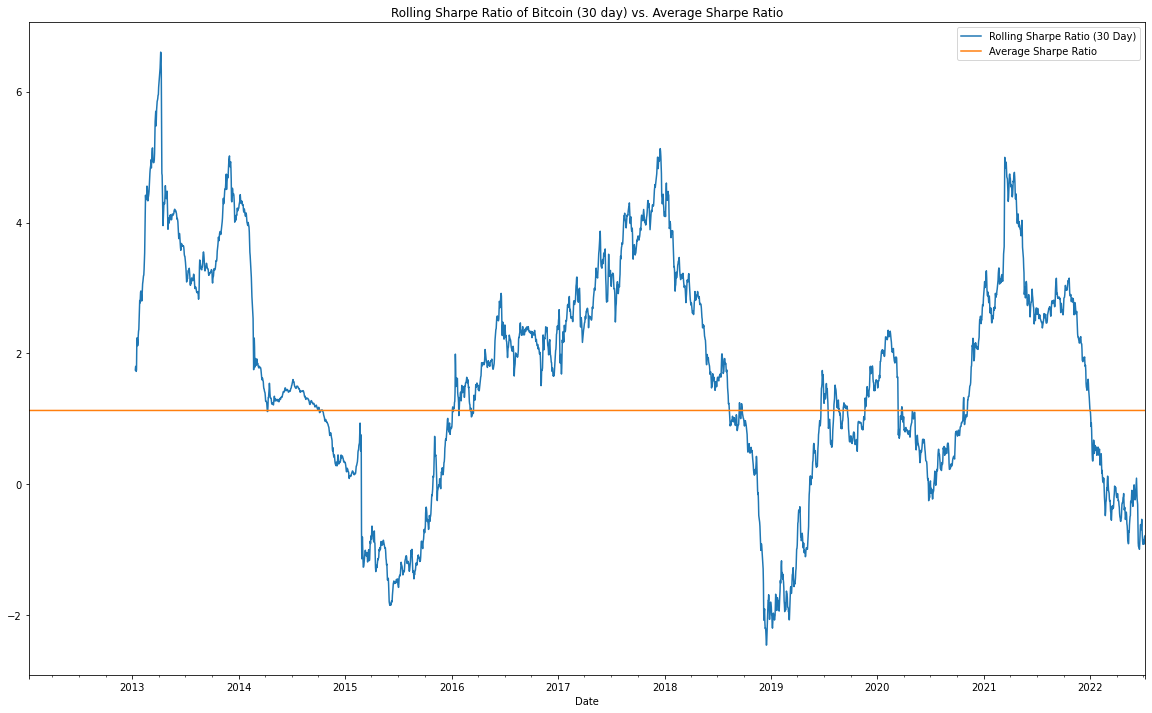

In [69]:
#bitcoin
#bitcoin.drop(columns=['Price','Open','High','Low','Vol.','avg daily price'], inplace=True)
#bitcoin
ax = rolling_sharpe_ratio.plot(figsize=(20,12), title= "Bitcoin: Rolling Sharpe Ratio (30 day) vs. Average Sharpe Ratio")
bitcoin.plot(ax=ax)
ax.legend(['Rolling Sharpe Ratio (30 Day)','Average Sharpe Ratio'])


In [71]:
# calculate rolling sharpe ratio of s&p
average_annual_return_sp500_rolling = sp500_daily_change.rolling(window=365).mean()*251

average_annual_return_sp500_rolling = average_annual_return_sp500_rolling.dropna()

average_annual_std_sp500_rolling = sp500_daily_change.rolling(window=365).std() * np.sqrt(365)
average_annual_std_sp500_rolling = average_annual_std_sp500_rolling.dropna()

average_annual_std_sp500_rolling

rolling_sharpe_ratio_sp500 = average_annual_return_sp500_rolling/average_annual_std_sp500_rolling

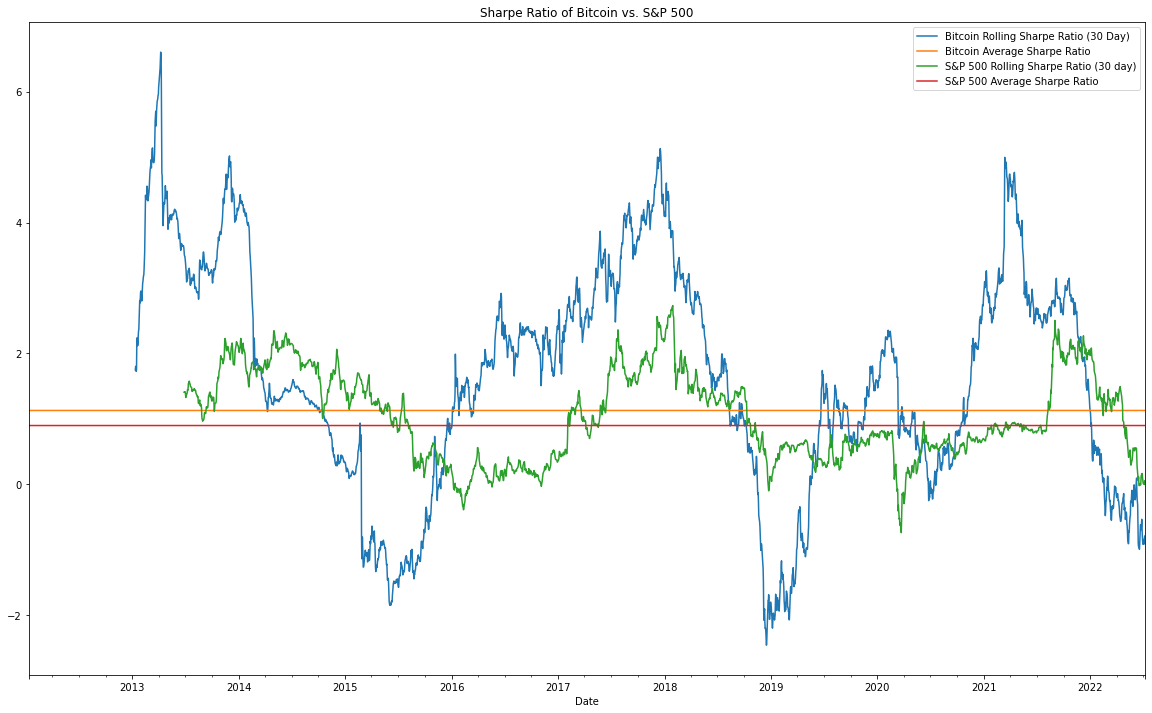

In [83]:
ax = rolling_sharpe_ratio.plot(figsize=(20,12), title= "Sharpe Ratio of Bitcoin vs. S&P 500")
bitcoin.plot(ax=ax)
rolling_sharpe_ratio_sp500.plot(ax=ax)
sp500.plot(ax=ax)
ax.legend(['Bitcoin Rolling Sharpe Ratio (30 Day)','Bitcoin Average Sharpe Ratio','S&P 500 Rolling Sharpe Ratio (30 day)', 'S&P 500 Average Sharpe Ratio'])